## Fetal health

### Packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt

### Functions

In [2]:
def FhFromFloatToString (value) -> str:
    """
    Converts a float value to a representative string based on the following rules:
    - If the value is 1.0, it returns 'normal'.
    - If the value is 2.0, it returns 'pathology_suspect'.
    - If the value is 3.0, it returns 'pathology'.
    - Otherwise, it returns 'undefined'.

    Parameters:
    - value (float): The value to convert to a string.

    Returns:
    - str: The representative string of the value.
    """
    if value == 1.0:
        return 'normal'
    elif value == 2.0:
        return 'pathology_suspect'
    elif value == 3.0:
        return 'pathology'
    else:
        return 'undefined'

In [3]:
def plot_normality_check(df):
    """
    Plots a histogram with the density curve overlaid for each variable in the DataFrame.

    Parameters:
    - df (DataFrame): The DataFrame containing the variables to plot.

    Returns:
    - None
    """
    # Set the style of the plots
    sns.set(style="whitegrid")
    
    # Iterate over the columns of the DataFrame
    for col in df.columns:
        # If the column is numeric
        if pd.api.types.is_numeric_dtype(df[col]):
            # Create the histogram plot
            plt.figure(figsize=(8, 6))
            sns.histplot(df[col], kde=True, color='blue', label='Observed data', stat='density')
            
            # Calculate mean and standard deviation for the normal distribution
            mu, sigma = df[col].mean(), df[col].std()
            # Create an array of values normally distributed
            x = np.linspace(df[col].min(), df[col].max(), 100)
            # Calculate the density of the normal distribution
            y = norm.pdf(x, mu, sigma)
            # Plot the normal distribution curve
            plt.plot(x, y, 'r--', label='Normal Distribution')
            
            # Add title and labels
            plt.title(f"Histogram - {col}")
            plt.xlabel("Values")
            plt.ylabel("Density")
            plt.legend()
            plt.show()

In [4]:
def zero_percentage_per_column(df):
    """
    Function to calculate the percentage of values equal to 0 for each column of the DataFrame.
    
    Args:
    df (pd.DataFrame): The DataFrame on which to perform the calculation.
    
    Returns:
    pd.Series: A series with the index of the columns and the percentage of values equal to 0 for each column.
    """
    zero_percentage = {}
    
    # Loop through all columns of the DataFrame
    for column in df.columns:
        # Calculate the percentage of values equal to 0 in the column
        zero_count = (df[column] == 0).sum()
        total_count = len(df[column])
        zero_percentage[column] = (zero_count / total_count) * 100
    
    return pd.Series(zero_percentage)

### Read data

In [5]:
file_path = "C:/Users/dibmir/dataset/fetal_health.csv"
df = pd.read_csv(file_path)
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


### Feature exploration/Data preparation & preprocessing

#### Target variable type conversion

In [6]:
# convert 'fetal_health' levels frmo float to string
df['fetal_health'] = df['fetal_health'].map(FhFromFloatToString)

#### Dropping duplicates

In [7]:
# Show the number of duplicates
print("Duplicates amount before dropping:", df.duplicated().sum())
# Drop duplicates
df = df.drop_duplicates()

Duplicates amount before dropping: 13


#### Standard deviation checking&dealing

In [8]:
# Check the standard deviation for each column, in a df without the target variable
df.iloc[:, :-1].std()

baseline value                                             9.837451
accelerations                                              0.003871
fetal_movement                                             0.046804
uterine_contractions                                       0.002941
light_decelerations                                        0.002966
severe_decelerations                                       0.000057
prolongued_decelerations                                   0.000592
abnormal_short_term_variability                           17.177782
mean_value_of_short_term_variability                       0.884368
percentage_of_time_with_abnormal_long_term_variability    18.337073
mean_value_of_long_term_variability                        5.632912
histogram_width                                           39.007706
histogram_min                                             29.562269
histogram_max                                             17.945175
histogram_number_of_peaks                       

In [8]:
colonnes_da_standardizzare = ['accelerations', 'fetal_movement','uterine_contractions','light_decelerations',
                             'severe_decelerations','prolongued_decelerations','histogram_number_of_zeroes',
                             'mean_value_of_short_term_variability']

# Set the object StandardScaler
scaler = StandardScaler()

# Standardize filtered columns
df[colonnes_da_standardizzare] = scaler.fit_transform(df[colonnes_da_standardizzare])

##### <span style="color:green">Min-Max normalization</span>

In [9]:
df_without_targetV = df.iloc[:, :-1]
raw_std = df_without_targetV.std()

# Set a dictionary in order to save all the normalized std
normalized_std_for_each_col = {}

# Standardize the data for each column and calculate the standard deviation of the standardized data
scaler = MinMaxScaler()
standardized_df = scaler.fit_transform(df_without_targetV)

for i, col in enumerate(df_without_targetV.columns):
    standardized_std = standardized_df[:, i].std()
    normalized_std_for_each_col[col] = raw_std[col] / standardized_std

normalized_std_for_each_col = pd.Series(normalized_std_for_each_col)
print("Standardized std for each column: ")
print(normalized_std_for_each_col)

Standardized std for each column: 
baseline value                                             54.012783
accelerations                                               0.019004
fetal_movement                                              0.481114
uterine_contractions                                        0.015004
light_decelerations                                         0.015004
severe_decelerations                                        0.001000
prolongued_decelerations                                    0.005001
abnormal_short_term_variability                            75.017754
mean_value_of_short_term_variability                        6.801610
percentage_of_time_with_abnormal_long_term_variability     91.021541
mean_value_of_long_term_variability                        50.712001
histogram_width                                           177.041898
histogram_min                                             109.025802
histogram_max                                             116.027459

In [10]:
# Columns having negligible variations in values emerged.
# Possible 'to do': removing them since it could lead to 'dirty' model estimation

#### <span style="color:black">Feature selection</span>

In [11]:
percentuali_zero = zero_percentage_per_column(df_without_targetV)
print(percentuali_zero)

baseline value                                             0.000000
accelerations                                             41.930904
fetal_movement                                            61.618552
uterine_contractions                                      15.286323
light_decelerations                                       57.643161
severe_decelerations                                      99.668717
prolongued_decelerations                                  91.575958
abnormal_short_term_variability                            0.000000
mean_value_of_short_term_variability                       0.000000
percentage_of_time_with_abnormal_long_term_variability    58.447705
mean_value_of_long_term_variability                        6.483673
histogram_width                                            0.000000
histogram_min                                              0.000000
histogram_max                                              0.000000
histogram_number_of_peaks                       

In [12]:
# Drop columns with std < 0.1
df_without_targetV = df_without_targetV.drop(columns=['accelerations','uterine_contractions',
                                                     'light_decelerations','severe_decelerations',
                                                     'prolongued_decelerations'])
df_without_targetV

,baseline value,fetal_movement,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.000,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.000,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.000,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.000,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,79.0,0.2,25.0,7.2,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0
2122,140.0,0.000,78.0,0.4,22.0,7.1,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0
2123,140.0,0.000,79.0,0.4,20.0,6.1,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0
2124,140.0,0.000,78.0,0.4,27.0,7.0,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0


##### <span style="color:green">Variance Inflation Factor</span>

In [12]:
# Adding a constant (intercept)
df_without_targetV = add_constant(df_without_targetV)
# Computing VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = df_without_targetV.columns
vif_data["VIF"] = [variance_inflation_factor(df_without_targetV.values, i) for i in range(df_without_targetV.shape[1])]
print(vif_data)

C:\Users\dibmir\AppData\Local\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                             Variable         VIF
0                                               const  260.525756
1                                      baseline value    6.681407
2                                       accelerations    2.885972
3                                      fetal_movement    1.138681
4                                uterine_contractions    1.281532
5                                 light_decelerations    3.449187
6                                severe_decelerations    1.134936
7                            prolongued_decelerations    2.736979
8                     abnormal_short_term_variability    1.916973
9                mean_value_of_short_term_variability    2.972435
10  percentage_of_time_with_abnormal_long_term_var...    1.875265
11                mean_value_of_long_term_variability    2.078607
12                                    histogram_width         inf
13                                      histogram_min         inf
14        

###### <span style="color:green">VIF computation after dropping'histogram_median'</span>

In [13]:
# 'histogram_mean' and 'histogram_median' have VIF > 10.
# Let's try to remove 'histogram_median' since its VIF = 24.5

In [14]:
df_without_targetV = df_without_targetV.drop(columns=['histogram_median'])

In [15]:
vif_data = pd.DataFrame()
vif_data["Variable"] = df_without_targetV.columns
vif_data["VIF"] = [variance_inflation_factor(df_without_targetV.values, i) for i in range(df_without_targetV.shape[1])]
print(vif_data)

C:\Users\dibmir\AppData\Local\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                             Variable         VIF
0                                               const  255.515779
1                                      baseline value    5.719583
2                                       accelerations    2.816906
3                                      fetal_movement    1.137712
4                                uterine_contractions    1.281467
5                                 light_decelerations    3.431858
6                                severe_decelerations    1.133681
7                            prolongued_decelerations    2.566660
8                     abnormal_short_term_variability    1.878975
9                mean_value_of_short_term_variability    2.952996
10  percentage_of_time_with_abnormal_long_term_var...    1.867447
11                mean_value_of_long_term_variability    2.066802
12                                    histogram_width         inf
13                                      histogram_min         inf
14        

#### <span style="color:black">Feature descriptive metrics</span>

In [16]:
df_without_targetV = df_without_targetV.drop(columns=['const'])
df_without_targetV.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_variance,histogram_tendency
count,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000
mean,133.304780,0.003188,0.009517,0.004387,0.001901,0.000003,0.000159,46.993848,1.335021,9.795078,8.166635,70.535258,93.564600,164.099858,4.077142,0.325603,137.454330,134.599621,18.907241,0.318504
std,9.837451,0.003871,0.046804,0.002941,0.002966,0.000057,0.000592,17.177782,0.884368,18.337073,5.632912,39.007706,29.562269,17.945175,2.951664,0.707771,16.402026,15.610422,29.038766,0.611075
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,0.000000,-1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,2.000000,0.000000
50%,133.000000,0.002000,0.000000,0.005000,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,68.000000,93.000000,162.000000,4.000000,0.000000,139.000000,136.000000,7.000000,0.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.000000,10.800000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,24.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.000000,50.700000,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,269.000000,1.000000


##### <span style="color:black">Zero count per columns metrics</span>

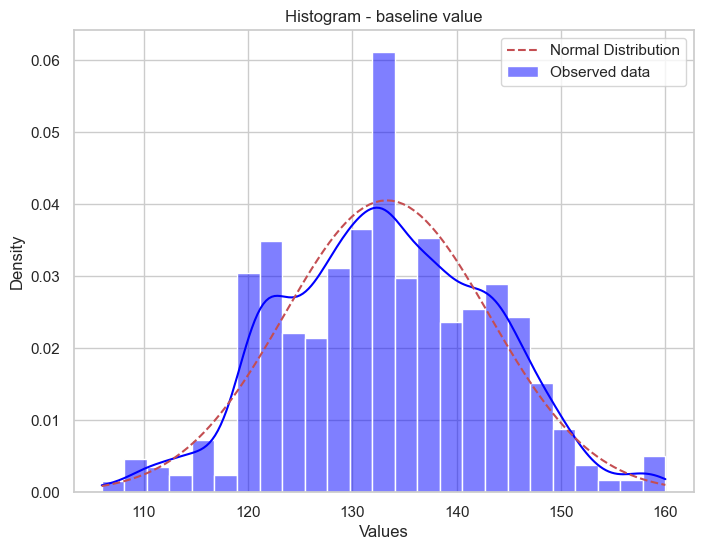

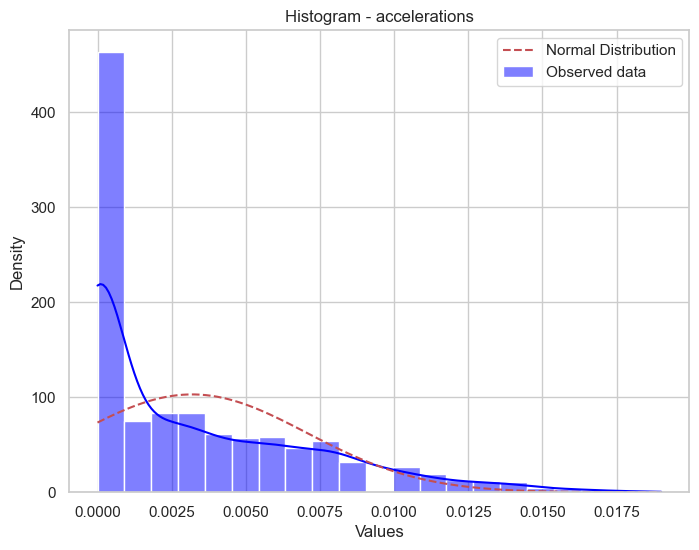

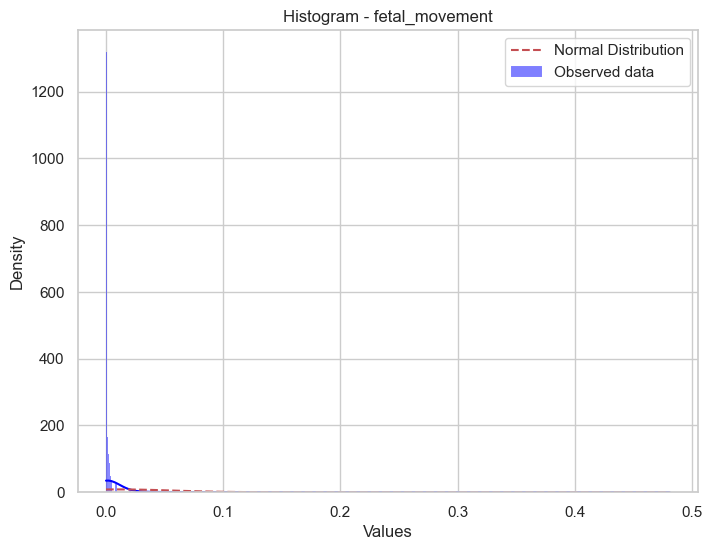

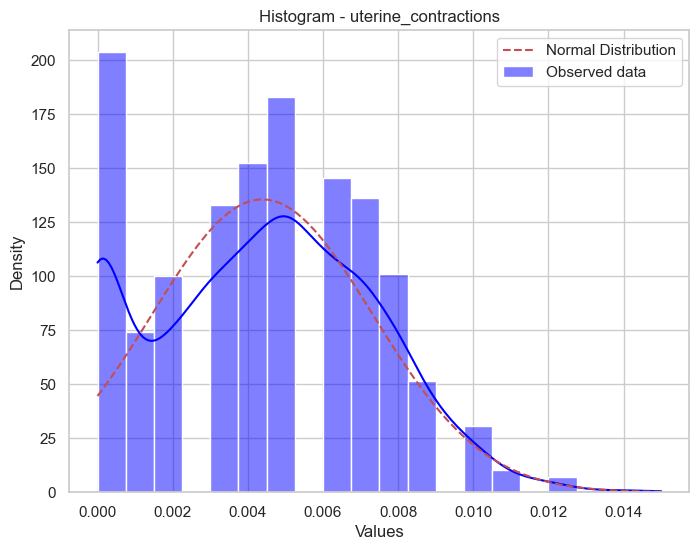

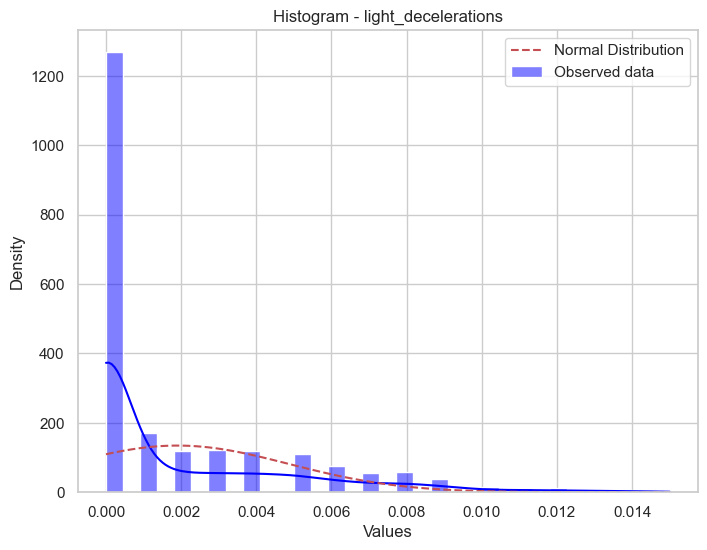

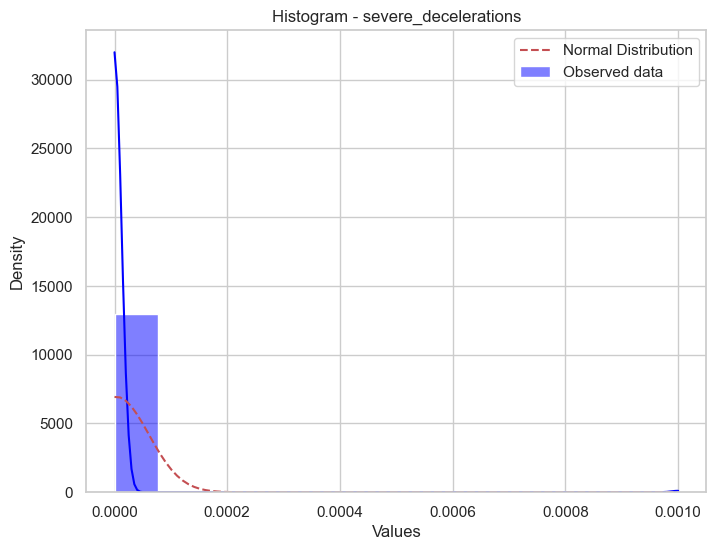

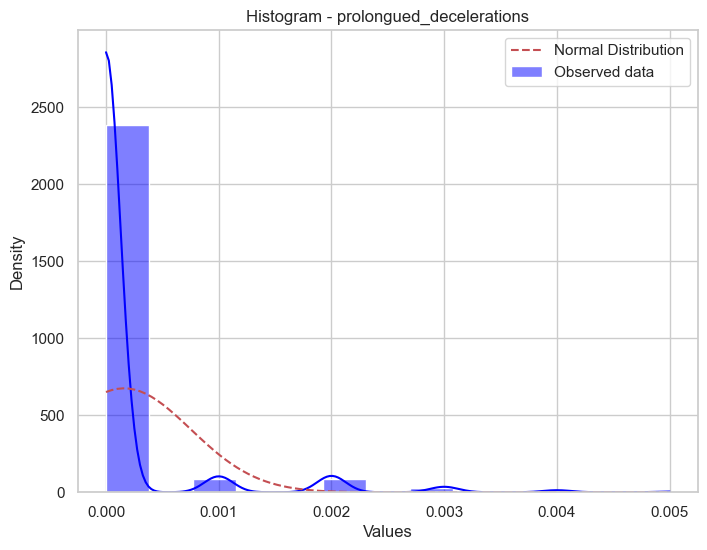

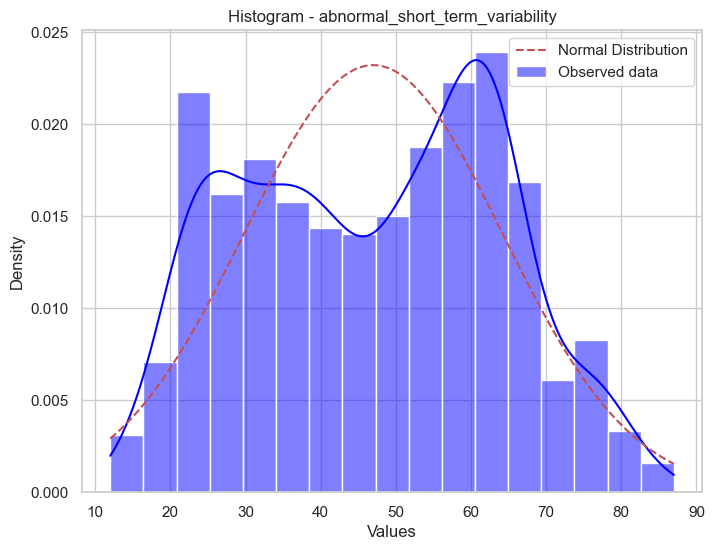

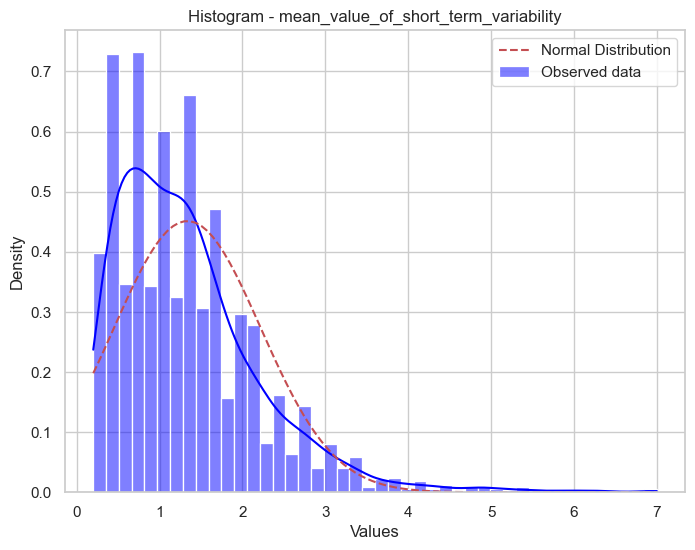

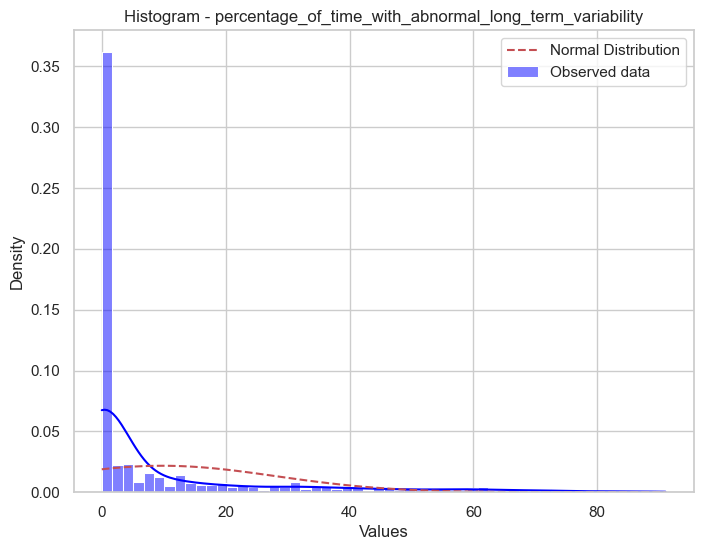

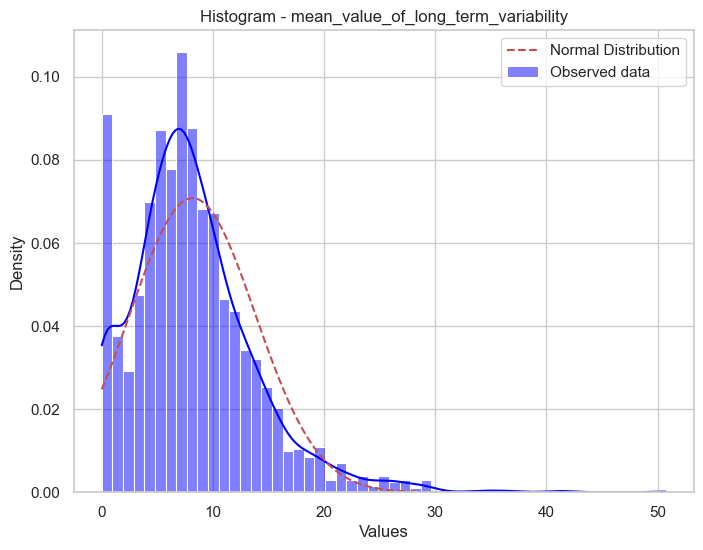

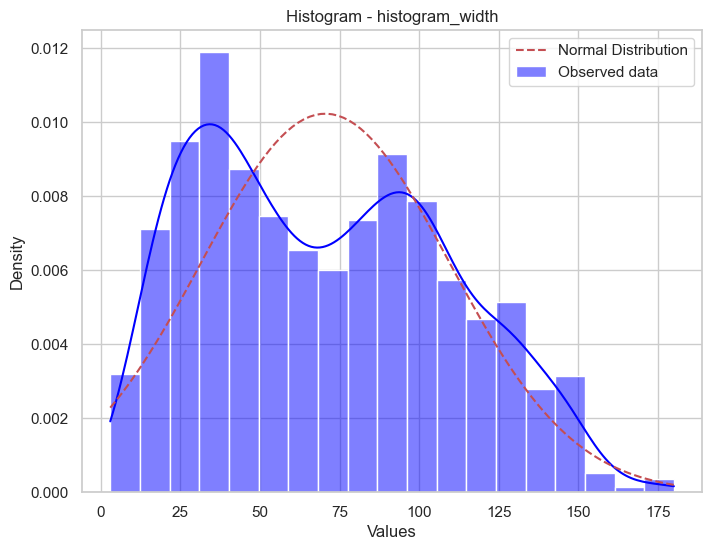

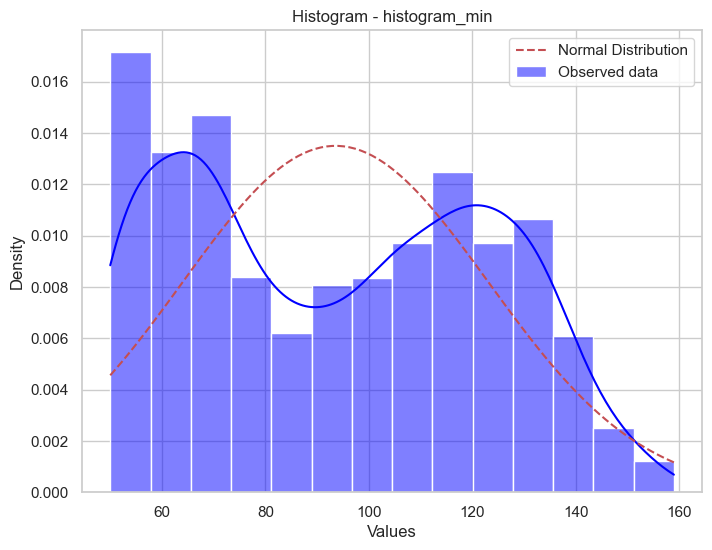

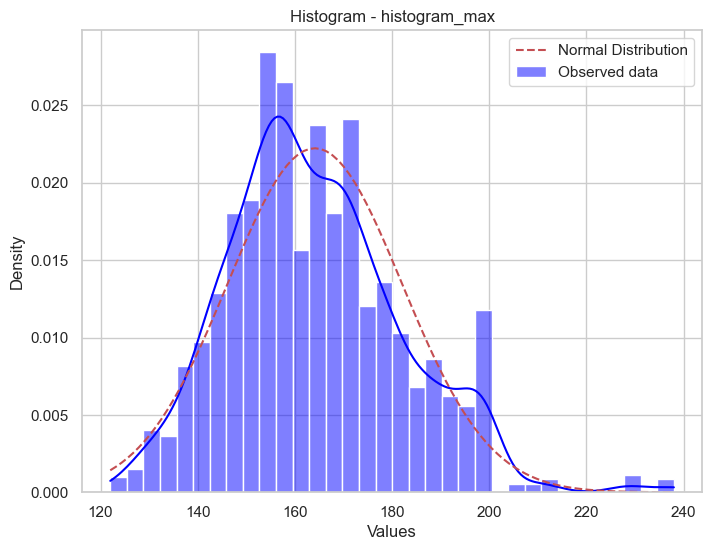

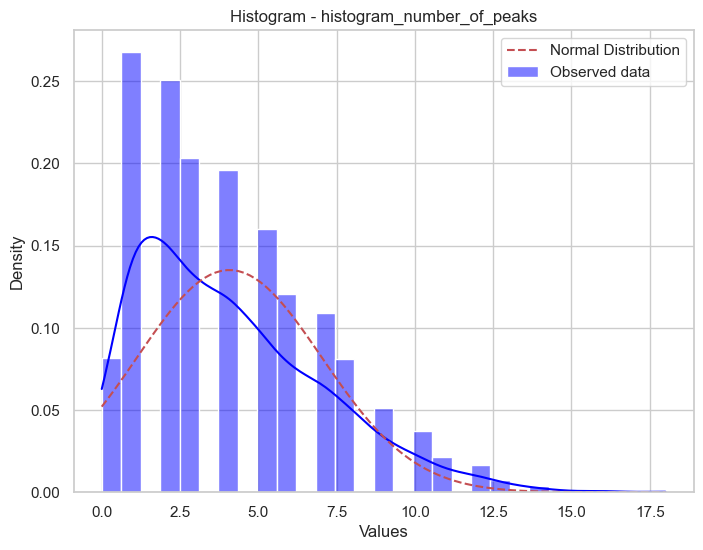

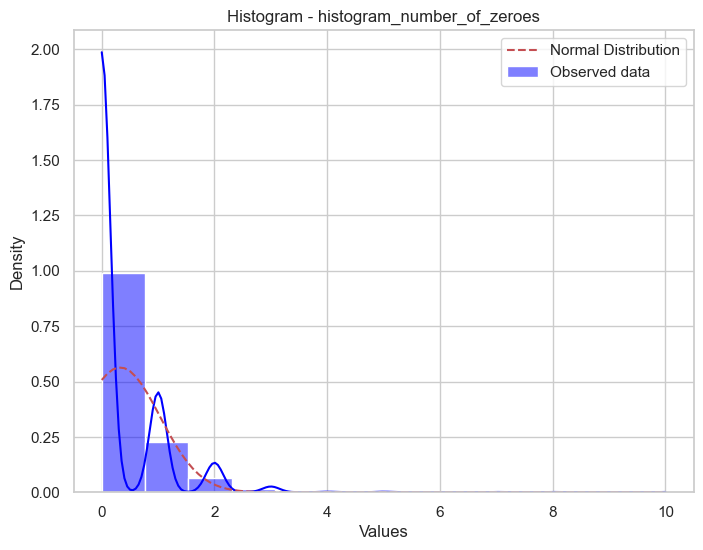

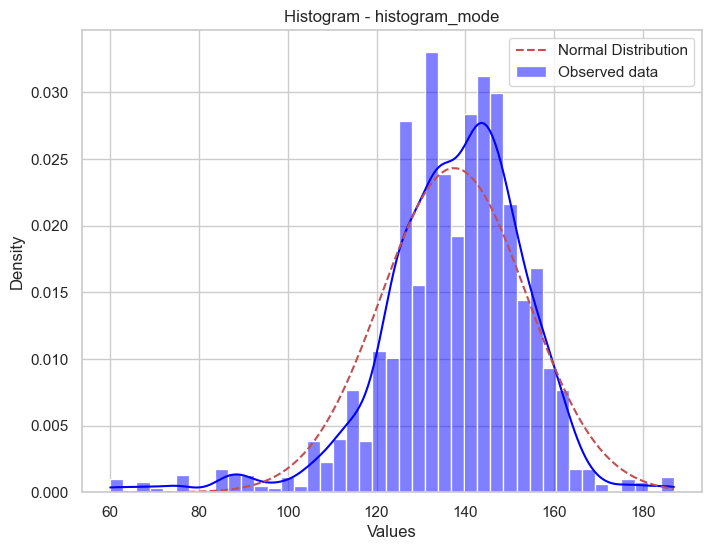

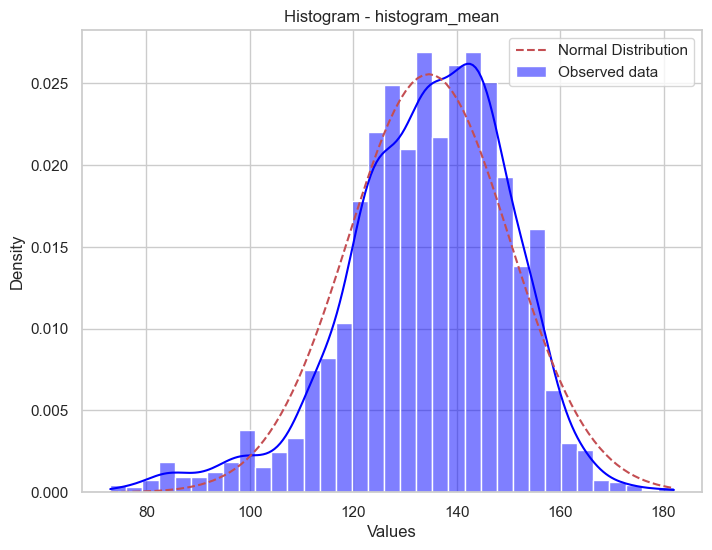

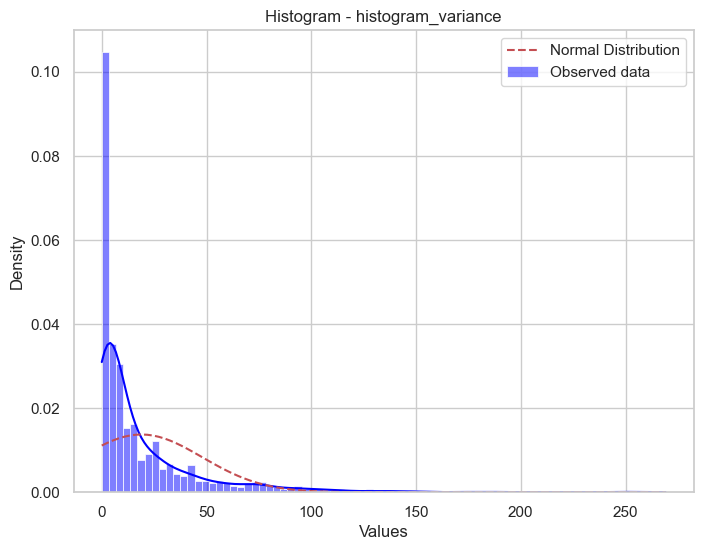

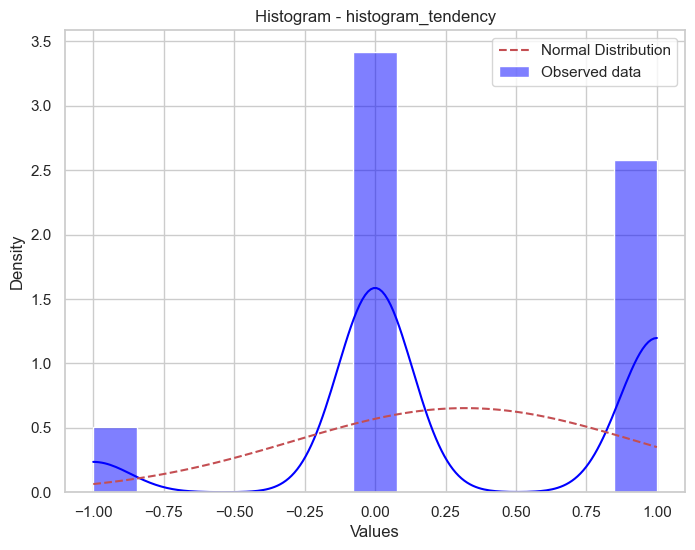

In [17]:
plot_normality_check(df_without_targetV)

#### Trying to log-transform 'fetal_movement'

In [18]:
# Apply the logarithmic transformation to the 'fetal_movement' column
df_without_targetV['fetal_movement_log'] = df_without_targetV['fetal_movement'].apply(lambda x: np.log(x + 1))  # Add 1 to avoid log(0)
# Calculate the standard deviation of the transformed column
std_fetal_movement_log = df_without_targetV['fetal_movement_log'].std()
# Print the standard deviation of the 'fetal_movement' column after the logarithmic transformation
print("Standard deviation of the 'fetal_movement' column after the logarithmic transformation:", std_fetal_movement_log)

Standard deviation of the 'fetal_movement' column after the logarithmic transformation: 0.03974498005348935


#### Trying to discretize 'uterine_contractions'

In [18]:
df_without_targetV['uterine_contractions'] = df_without_targetV['uterine_contractions']*600

In [19]:
unique_values_sorted = df_without_targetV['uterine_contractions'].unique()
unique_values_sorted.sort()
unique_values_sorted

array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. , 6.6, 7.2,
       7.8, 8.4, 9. ])

In [20]:
value_counts_series = pd.Series(df_without_targetV['uterine_contractions']).value_counts()
print(value_counts_series)

uterine_contractions
0.0    323
3.0    290
2.4    242
3.6    231
4.2    216
1.8    211
4.8    160
1.2    159
0.6    118
5.4     82
6.0     49
6.6     16
7.2     11
7.8      2
8.4      2
9.0      1
Name: count, dtype: int64


In [32]:
values_below_reference = value_counts_series[value_counts_series.index < 4]
# Somma dei valori al di sotto del riferimento
sum_below_reference = values_below_reference.sum()
percentage_of_freq = round((sum_below_reference/2113)*100,2)
print("the % of freq is: ",percentage_of_freq,"%")

the % of freq is:  74.49 %


### <span style="color:red">TASK</span>

### 1) build 'uterin_contractions' bins after rescaling over 10-mins windows
### 2) try to handle 'accelerations' column